<h1 align="center">The Best Classifier</h1>

This notebook is created for the final assignment of the course named **[Machine Learning with Python](https://www.coursera.org/learn/machine-learning-with-python)** on **Coursera**. In this assignment, I have implemented all the four type of classification algorithm on a signle train and test dataset to figure out the classifier for this dataset. The implemented classification algorithms are - 
- k-Nearest Neighbour
- Decision Tree
- Support Vector Machine
- Logistic Regression

We have also calculated different scores for all the classification algorithms to figure out the best classifier. Like -
- Accuracy score
- Confussion Matrix
- Jaccard index
- F1-score
- LogLoass

**Datasets Links**
- Train set - [https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv)
- Test set - [https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv)

## Installing and Importing libraies

In [1]:
# Installing packages for the environemt
!pip3 install opendatasets scikit-learn --upgrade --quiet
!pip3 install numpy pandas-profiling plotly matplotlib seaborn --quiet
print("Installestion completed")

Installestion completed


In [2]:
# Importing required libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss, confusion_matrix
%matplotlib inline

# For better visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading datasests

In [3]:
od.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
od.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

Using downloaded and verified file: .\loan_train.csv
Using downloaded and verified file: .\loan_test.csv


In [4]:
# Load datasets
raw_train_df = pd.read_csv("loan_train.csv")
raw_test_df = pd.read_csv("loan_test.csv")

In [5]:
raw_train_df.dropna(subset=['loan_status'], inplace=True)
raw_train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
raw_test_df.dropna(subset=['loan_status'], inplace=True)
raw_test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Data preprocessing

### Converting to date time object

In [7]:
raw_train_df["effective_date"] = pd.to_datetime(raw_train_df["effective_date"])
raw_test_df["effective_date"] = pd.to_datetime(raw_test_df["effective_date"])
raw_train_df["due_date"] = pd.to_datetime(raw_train_df["due_date"])
raw_test_df["due_date"] = pd.to_datetime(raw_test_df["due_date"])
raw_train_df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


Extracting `dayofweek` and `weekend` from the `effective_date` column for both datasets

In [8]:
# Extractig dayofweek
raw_train_df['dayofweek'] = raw_train_df['effective_date'].dt.dayofweek
raw_test_df['dayofweek'] = raw_test_df['effective_date'].dt.dayofweek

In [9]:
#Extracting weekend
raw_train_df['weekend'] = raw_train_df['dayofweek'].apply(lambda x:1 if(x>3) else 0)
raw_test_df['weekend'] = raw_test_df['dayofweek'].apply(lambda x:1 if(x>3) else 0)

In [10]:
raw_train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Converting categorical features to numeric values 

Put `0` insted of `male` and `1` insted of `female` in the `Gender` column

In [11]:
raw_train_df["Gender"].replace(to_replace=["male","female"], value=[0,1], inplace=True)
raw_test_df["Gender"].replace(to_replace=['male','female'], value=[0,1], inplace=True)
raw_train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


#### OneHotEncoding for the `education` column

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_train_df[['education']])
encoded_cols = list(encoder.get_feature_names_out(['education']))
encoded_cols

['education_Bechalor',
 'education_High School or Below',
 'education_Master or Above',
 'education_college']

In [13]:
raw_train_df[encoded_cols] = encoder.transform(raw_train_df[['education']])
raw_test_df[encoded_cols]= encoder.transform(raw_test_df[['education']])
raw_train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,0.0,1.0,0.0,0.0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1.0,0.0,0.0,0.0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,0.0,0.0,0.0,1.0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,0.0,0.0,0.0,1.0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,0.0,0.0,0.0,1.0


#### Scaling `Principal`, `terms`, `age` columns by `StandardScaler`

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(raw_train_df[['Principal','terms', 'age']])
raw_train_df[['Principal','terms', 'age']] = scaler.transform(raw_train_df[['Principal','terms', 'age']])
raw_test_df[['Principal','terms', 'age']] = scaler.transform(raw_test_df[['Principal','terms', 'age']])
raw_test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1,1,PAIDOFF,0.515785,0.920718,2016-09-08,2016-10-07,3.160619,Bechalor,1,3,0,1.0,0.0,0.0,0.0
1,5,5,PAIDOFF,-5.890524,-1.961686,2016-09-09,2016-09-15,0.673339,Master or Above,0,4,1,0.0,0.0,1.0,0.0
2,21,21,PAIDOFF,0.515785,0.920718,2016-09-10,2016-10-09,1.999888,High School or Below,1,5,1,0.0,1.0,0.0,0.0
3,24,24,PAIDOFF,0.515785,0.920718,2016-09-10,2016-10-09,-0.819029,college,0,5,1,0.0,0.0,0.0,1.0
4,35,35,PAIDOFF,-1.314589,-0.959111,2016-09-11,2016-09-25,-0.321573,Bechalor,0,6,1,1.0,0.0,0.0,0.0


## Preparing datasets for Trainig

Separating train and test set from the raw datasets

In [15]:
input_cols = [ 'Principal', 'terms', 'age', 'Gender',
       'weekend', 'education_Bechalor', 'education_High School or Below',
       'education_Master or Above', 'education_college']
target_cols = 'loan_status'

In [16]:
train_inputs = raw_train_df[input_cols].copy()
test_inputs= raw_test_df[input_cols].copy()
train_inputs.head()

,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0.515785,0.920718,2.331526,0,0,0.0,1.0,0.0,0.0
1,0.515785,0.920718,0.341701,1,0,1.0,0.0,0.0,0.0
2,0.515785,-0.959111,-0.653211,0,0,0.0,0.0,0.0,1.0
3,0.515785,0.920718,-0.487392,1,1,0.0,0.0,0.0,1.0
4,0.515785,0.920718,-0.321573,0,1,0.0,0.0,0.0,1.0


In [17]:
X_train, y_train = train_inputs, raw_train_df[target_cols]
X_test, y_test = test_inputs, raw_test_df[target_cols]

# Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


In [18]:
def predict_and_plot(inputs, targets,model, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

## K Nearest Neighbor(KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Setup the model
knn_model = KNeighborsClassifier(n_neighbors = 5)

#Train the model
knn_model.fit(X_train,y_train)

# Testting the model
train_predictions = knn_model.predict(X_train)
accuracy_score(train_predictions, y_train)

0.8034682080924855

### Checking the best values of `k` for the KNN classifier

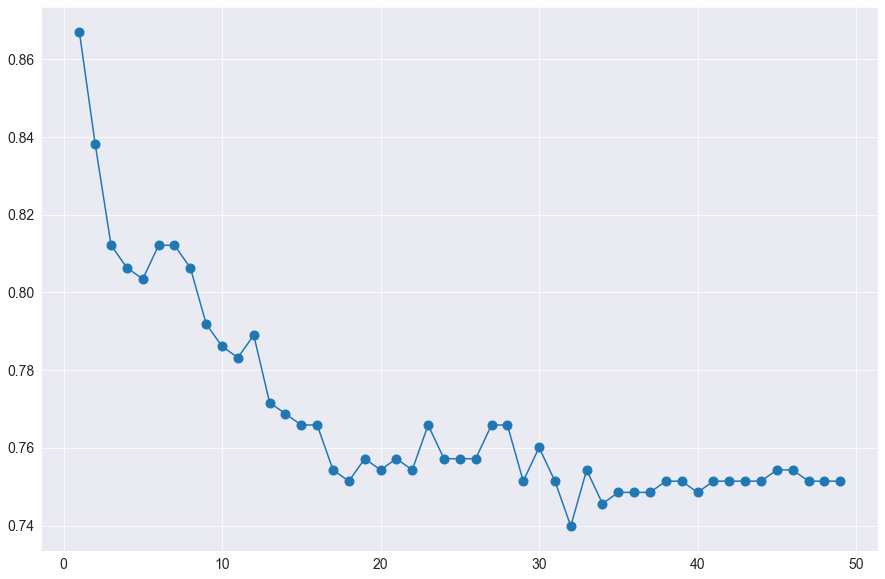

In [21]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    error_rate.append(accuracy_score(y_train,pred))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

So the best value of `n_neighbors` is 32. Now we will rebuild our model with this value

In [22]:
#Setup the model
knn_model = KNeighborsClassifier(n_neighbors = 32)

#Train the model
knn_model.fit(X_train,y_train)

# Testting the model
train_predictions = knn_model.predict(X_train)
accuracy_score(train_predictions, y_train)

0.7398843930635838

Accuracy: 73.99%


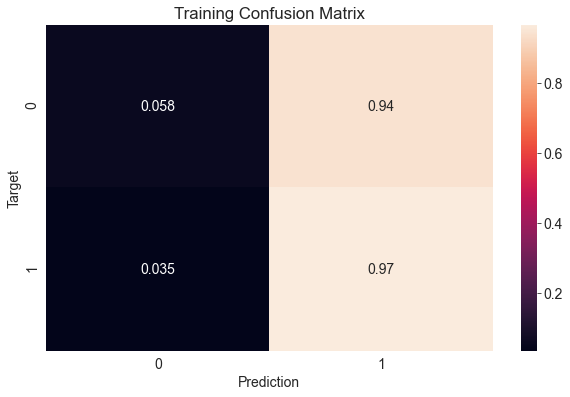

In [23]:
train_preds = predict_and_plot(X_train, y_train, knn_model, 'Training')

Accuracy: 77.78%


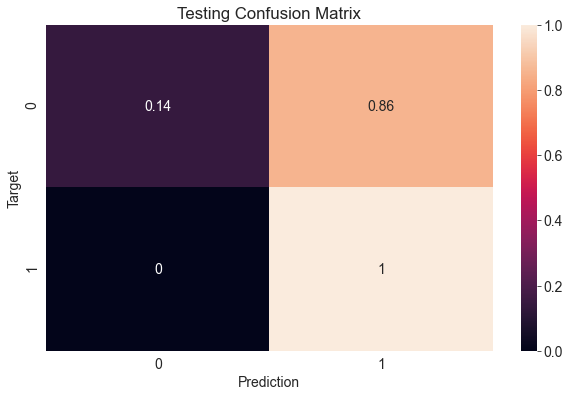

In [24]:
test_preds = predict_and_plot(X_test, y_test,knn_model, 'Testing')

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#Setup the model
dct_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=19,random_state=42)

#Train the model
dct_model.fit(X_train,y_train)

# Testting the model
train_predictions = dct_model.predict(X_train)
accuracy_score(train_predictions, y_train)

0.8034682080924855

Accuracy: 80.35%


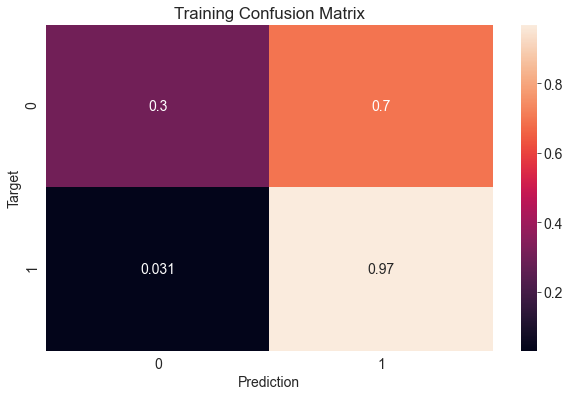

In [27]:
train_preds = predict_and_plot(X_train, y_train, dct_model, 'Training')

Accuracy: 75.93%


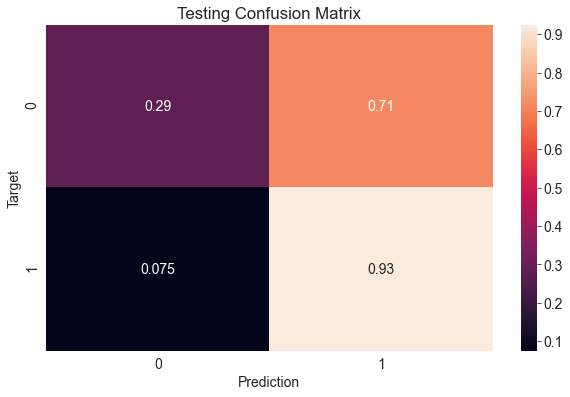

In [28]:
test_preds = predict_and_plot(X_test, y_test,dct_model, 'Testing')

### Plotting the Tree

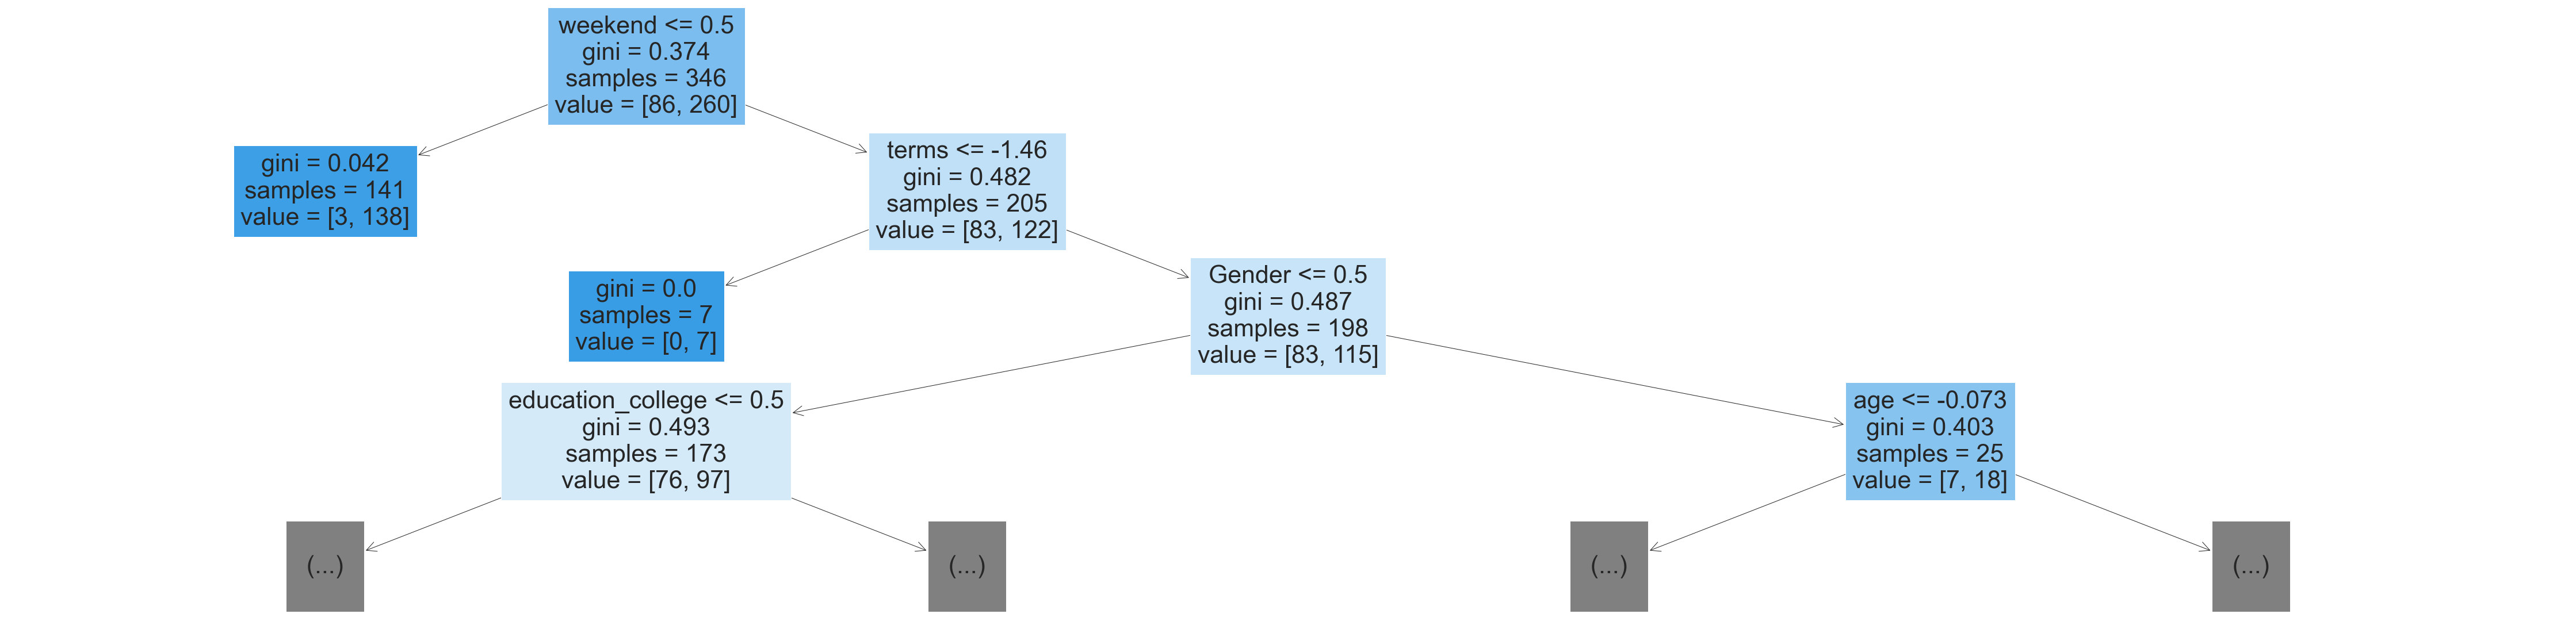

In [29]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(dct_model, feature_names=X_train.columns, max_depth=3, filled=True);

## Support vector machine

In [30]:
 from sklearn import svm

In [31]:
#Setup the model
svm_model = svm.SVC()

#Train the model
svm_model.fit(X_train,y_train)

# Testting the model
train_predictions = svm_model.predict(X_train)
accuracy_score(train_predictions, y_train)

0.7514450867052023

Accuracy: 75.14%


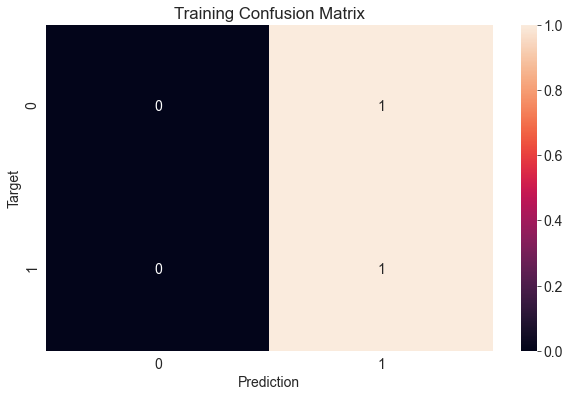

In [32]:
train_preds = predict_and_plot(X_train, y_train, svm_model, 'Training')

Accuracy: 74.07%


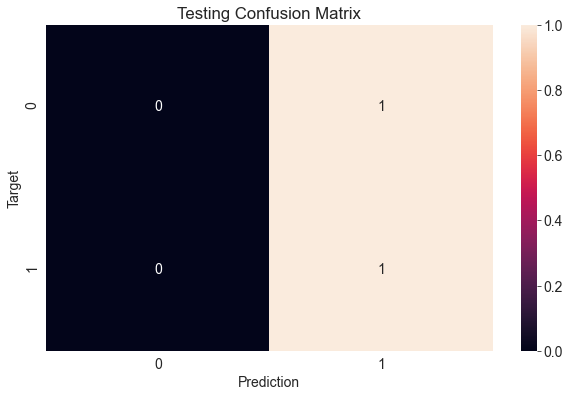

In [33]:
test_preds = predict_and_plot(X_test, y_test,svm_model, 'Testing')

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Setup a Model
logistic_model = LogisticRegression(solver='liblinear',max_iter=50)

# Train a model
logistic_model.fit(X_train, y_train)

# Testing model
train_predictions= logistic_model.predict(X_train)
accuracy_score(train_predictions, y_train)

0.7341040462427746

Accuracy: 73.41%


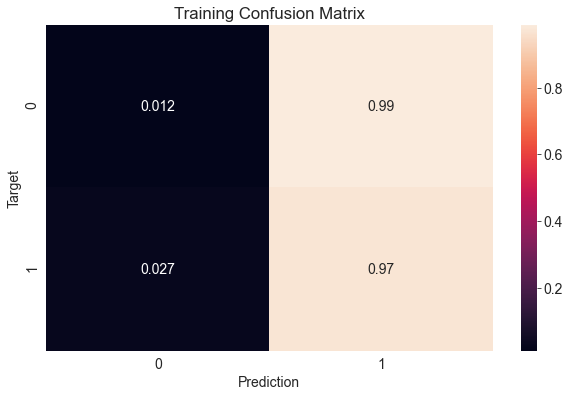

In [36]:
train_preds = predict_and_plot(X_train, y_train, logistic_model, 'Training')

Accuracy: 75.93%


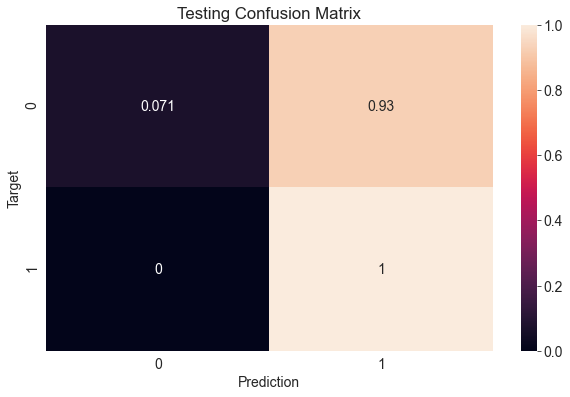

In [37]:
test_preds = predict_and_plot(X_test, y_test,logistic_model, 'Testing')

### Calculationg results scores for final report

In [38]:
# For Logistic regression
preds = logistic_model.predict(X_test)
preds_proba = logistic_model.predict_proba(X_test)
jac_score = jaccard_score(y_test, preds, average=None)[1]
F1_score = f1_score(y_test, preds, average='weighted')
Log_loss = log_loss(y_test, preds_proba)
print(f'jaccard_score = {jac_score} \nf1_score={F1_score} \nlog_loss={Log_loss}')

jaccard_score = 0.7547169811320755 
f1_score=0.6717642373556352 
log_loss=0.48252207133265196


In [39]:
# For svm
preds = svm_model.predict(X_test)
jac_score = jaccard_score(y_test, preds, average=None)[1]
F1_score = f1_score(y_test, preds, average='weighted')
print(f'jaccard_score = {jac_score} \nf1_score={F1_score}')

jaccard_score = 0.7407407407407407 
f1_score=0.6304176516942475


In [40]:
# For DecisionTree
preds = dct_model.predict(X_test)
jac_score = jaccard_score(y_test, preds, average=None)[1]
F1_score = f1_score(y_test, preds, average='weighted')
print(f'jaccard_score = {jac_score} \nf1_score={F1_score}')

jaccard_score = 0.74 
f1_score=0.7288207747977863


In [41]:
# For K Nearest Neighbor(KNN)
preds = knn_model.predict(X_test)
jac_score = jaccard_score(y_test, preds, average=None)[1]
F1_score = f1_score(y_test, preds, average='weighted')
print(f'jaccard_score = {jac_score} \nf1_score={F1_score}')

jaccard_score = 0.7692307692307693 
f1_score=0.708937198067633


# Report 
| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.77    | 0.71     | N/A      |
| Decision Tree      | 0.74    | 0.73     | N/A      |
| SVM                | 0.74    | 0.63     | N/A      |
| LogisticRegression | 0.755  | 0.67   | 0.48    |

# Conclusion
From the report we can see that `KNN` has the `maximum jaccard score`. And `Decision Tree` has the maximun `F1-score`.